In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import plotly.graph_objects as go
%matplotlib inline

In [20]:
data = pd.read_csv('/content/drive/MyDrive/Projects/FDS/Datasets/NIFTY_PHARMA(unprocessed).csv')
df = pd.DataFrame(data)
df.head()

,Date,Open,High,Low,Close,Volume
0,1/31/2011 15:30:00,4633.30,4700.60,4593.90,4689.80,0
1,02-01-2011 15:30,4705.80,4723.95,4598.10,4629.25,0
2,02-02-2011 15:30,4643.65,4672.30,4603.25,4630.20,0
3,02-03-2011 15:30,4618.95,4662.35,4605.40,4640.90,0
4,02-04-2011 15:30,4637.85,4679.55,4557.10,4573.25,0


In [5]:
df.shape

(2616, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2616 entries, 0 to 2615
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2616 non-null   object 
 1   Open    2616 non-null   float64
 2   High    2616 non-null   float64
 3   Low     2616 non-null   float64
 4   Close   2616 non-null   float64
 5   Volume  2616 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 122.8+ KB


In [7]:
df.isna()

,Date,Open,High,Low,Close,Volume
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
2611,False,False,False,False,False,False
2612,False,False,False,False,False,False
2613,False,False,False,False,False,False
2614,False,False,False,False,False,False


In [21]:
df.iloc[:,1:] = df.iloc[:,1:].interpolate(axis = 1)

<ipython-input-21-3441a47a8b73>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
2611    0.0
2612    0.0
2613    0.0
2614    0.0
2615    0.0
Name: Volume, Length: 2616, dtype: float64' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[:,1:] = df.iloc[:,1:].interpolate(axis = 1)


In [22]:
for i in range(df.shape[0]):
  df.at[i, 'Date'] = df.at[i, 'Date'].split()[0].replace('/','-')
  if ((df.at[i, 'Date'][0] != '0') and (df.at[i, 'Date'][1] == '-')):
    df.at[i, 'Date'] = '0' + df.at[i, 'Date']

data1 = df
df.head()

,Date,Open,High,Low,Close,Volume
0,01-31-2011,4633.30,4700.60,4593.90,4689.80,0.0
1,02-01-2011,4705.80,4723.95,4598.10,4629.25,0.0
2,02-02-2011,4643.65,4672.30,4603.25,4630.20,0.0
3,02-03-2011,4618.95,4662.35,4605.40,4640.90,0.0
4,02-04-2011,4637.85,4679.55,4557.10,4573.25,0.0


In [10]:
df.describe()

,Open,High,Low,Close,Volume
count,2616.000000,2616.000000,2616.000000,2616.000000,2616.0
mean,9012.409843,9081.236353,8928.473777,8999.502274,0.0
std,2677.064618,2694.686224,2644.751432,2668.029961,0.0
min,4334.600000,4368.050000,4274.250000,4300.250000,0.0
25%,7186.225000,7273.625000,7112.162500,7175.950000,0.0
50%,9136.525000,9218.200000,9044.175000,9129.975000,0.0
75%,11238.825000,11317.125000,11135.525000,11216.675000,0.0
max,14702.950000,14743.300000,14591.850000,14669.900000,0.0


In [23]:
numeric_df = df.select_dtypes(include=np.number)  # Select only numeric columns
median_values = numeric_df.median(axis=0)
print(median_values)

Open      9136.525
High      9218.200
Low       9044.175
Close     9129.975
Volume       0.000
dtype: float64


In [24]:
df.to_csv('/content/drive/MyDrive/Projects/FDS/Datasets/NIFTY-PHARMA(processed).csv', index = False)
df1 = pd.read_csv('/content/drive/MyDrive/Projects/FDS/Datasets/NIFTY-PHARMA(processed).csv')
data = df1
df1.head()

,Date,Open,High,Low,Close,Volume
0,01-31-2011,4633.30,4700.60,4593.90,4689.80,0.0
1,02-01-2011,4705.80,4723.95,4598.10,4629.25,0.0
2,02-02-2011,4643.65,4672.30,4603.25,4630.20,0.0
3,02-03-2011,4618.95,4662.35,4605.40,4640.90,0.0
4,02-04-2011,4637.85,4679.55,4557.10,4573.25,0.0


In [25]:
mn = df['Close'].min()
mx = df['Close'].max()

In [26]:
x = df.iloc[:,1:df.shape[1]-1]
df.iloc[:,1:df.shape[1]-1] = (x-x.min())/ (x.max() - x.min())
df.head()

,Date,Open,High,Low,Close,Volume
0,01-31-2011,0.028809,0.032052,0.030981,0.037566,0.0
1,02-01-2011,0.035801,0.034303,0.031388,0.031727,0.0
2,02-02-2011,0.029807,0.029325,0.031887,0.031819,0.0
3,02-03-2011,0.027425,0.028366,0.032096,0.032851,0.0
4,02-04-2011,0.029248,0.030023,0.027414,0.026327,0.0


In [27]:
print("Min:")
print(x.min())
print("")
print("Max:")
print(x.max())

Min:
Open     4334.60
High     4368.05
Low      4274.25
Close    4300.25
dtype: float64

Max:
Open     14702.95
High     14743.30
Low      14591.85
Close    14669.90
dtype: float64


In [28]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

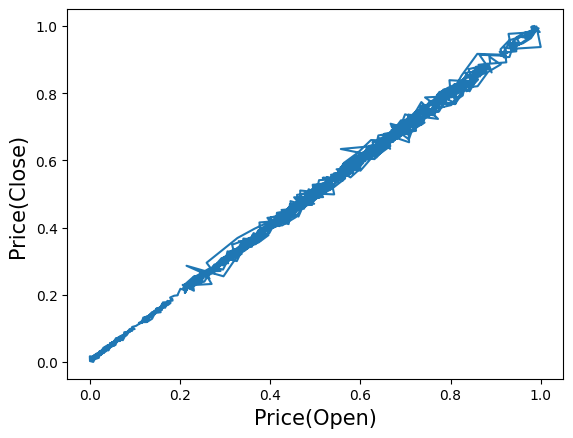

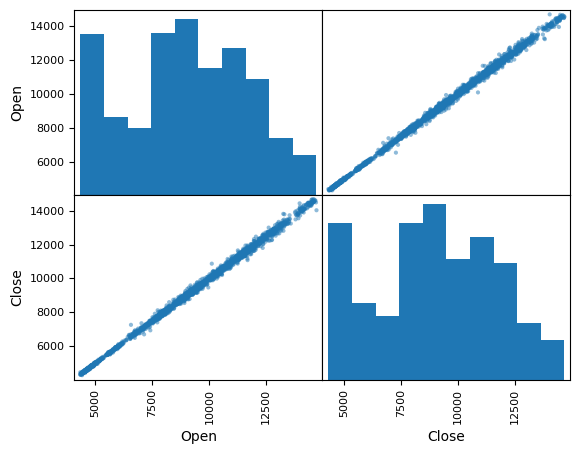

In [29]:
plt.plot((df.Open), (df.Close))
plt.ylabel('Price(Close) ', fontsize=15)
plt.xlabel('Price(Open)', fontsize=15)
plt.show()
print("\n\n")
scatter_matrix(data[['Open','Close']])
plt.show()

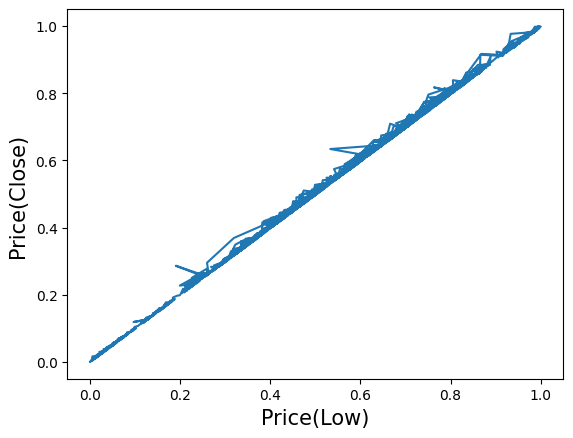

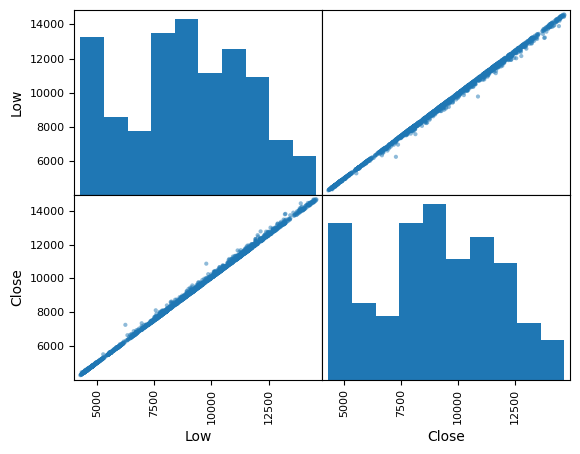

In [30]:
plt.plot((df.Low), (df.Close))
plt.ylabel('Price(Close) ', fontsize=15)
plt.xlabel('Price(Low)', fontsize=15)
plt.show()
print("\n\n")
scatter_matrix(data[['Low','Close']])
plt.show()

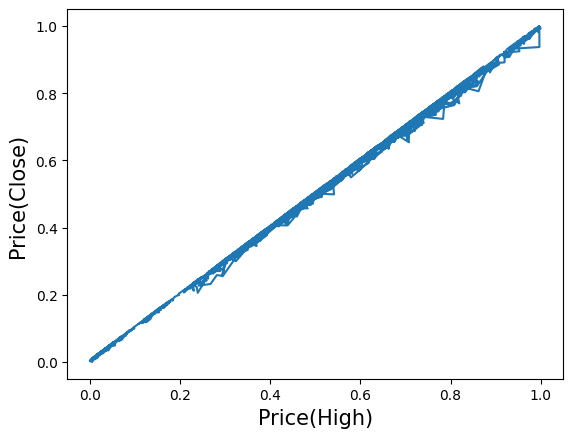

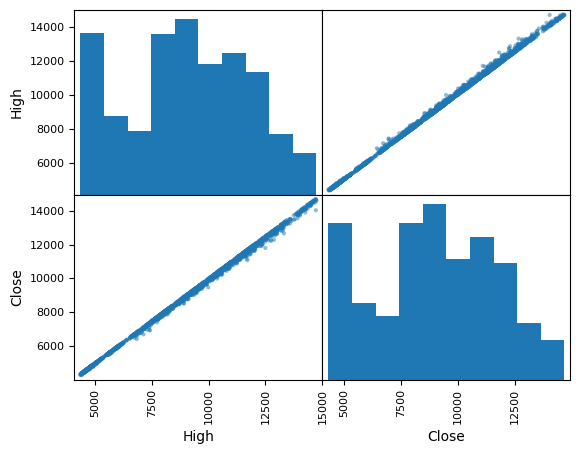

In [31]:
plt.plot((df.High), (df.Close))
plt.ylabel('Price(Close) ', fontsize=15)
plt.xlabel('Price(High)', fontsize=15)
plt.show()
print("\n\n")
scatter_matrix(data[['High','Close']])
plt.show()

In [32]:
from datetime import datetime as dt
data1['Date'] = pd.to_datetime(data1['Date'])
data1['Date'] = [i.date() for i in data1['Date']]
start = dt.strptime('2020-01-20','%Y-%M-%d').date()
end = dt.strptime('2021-07-20','%Y-%M-%d').date()
covid_data = df.loc[(data1['Date'] > start) & (data1['Date'] <= end)]

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

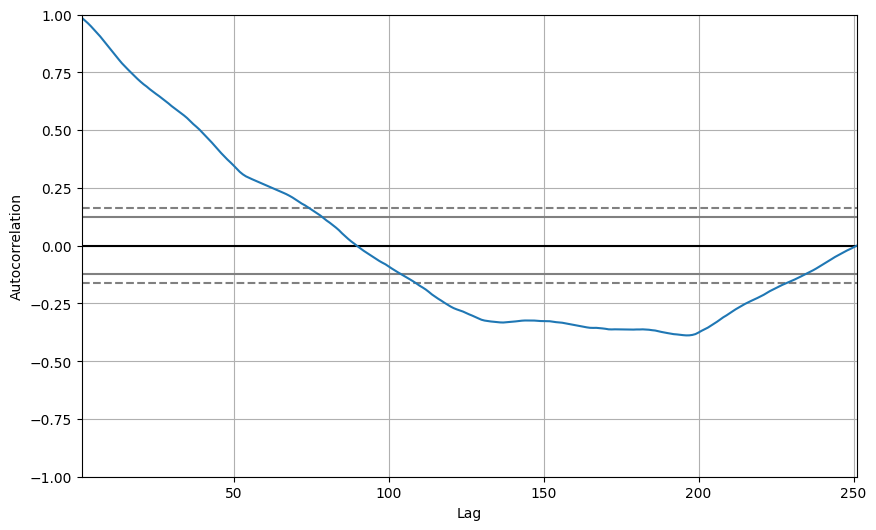

In [33]:
# Autocorrelation of data during covid
plt.rc("figure", figsize=(10,6))
pd.plotting.autocorrelation_plot(covid_data['Close'])

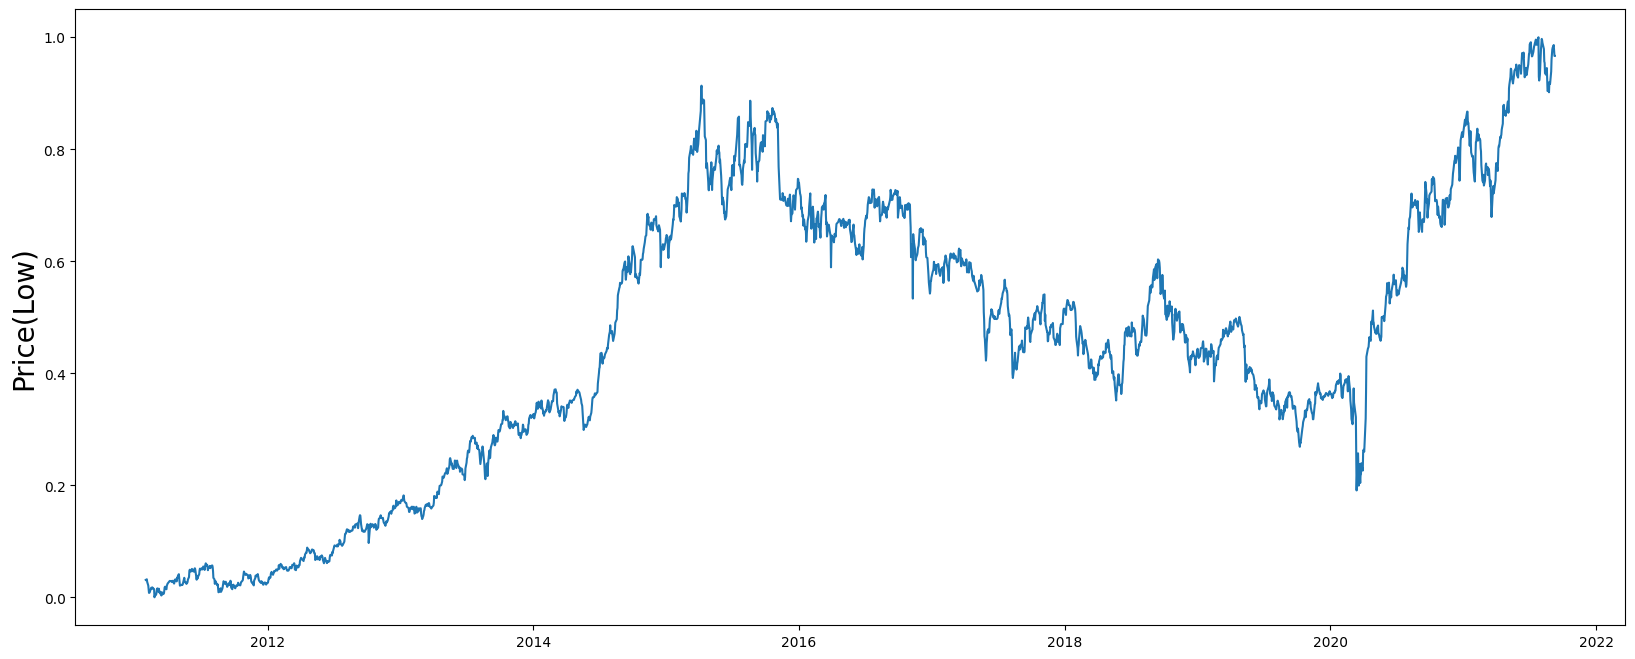

In [34]:
entire_data = data1.set_index('Date')
plt.figure(figsize=(20,8))
plt.ylabel('Price(Low)', fontsize=20)
plt.plot(entire_data.Low);

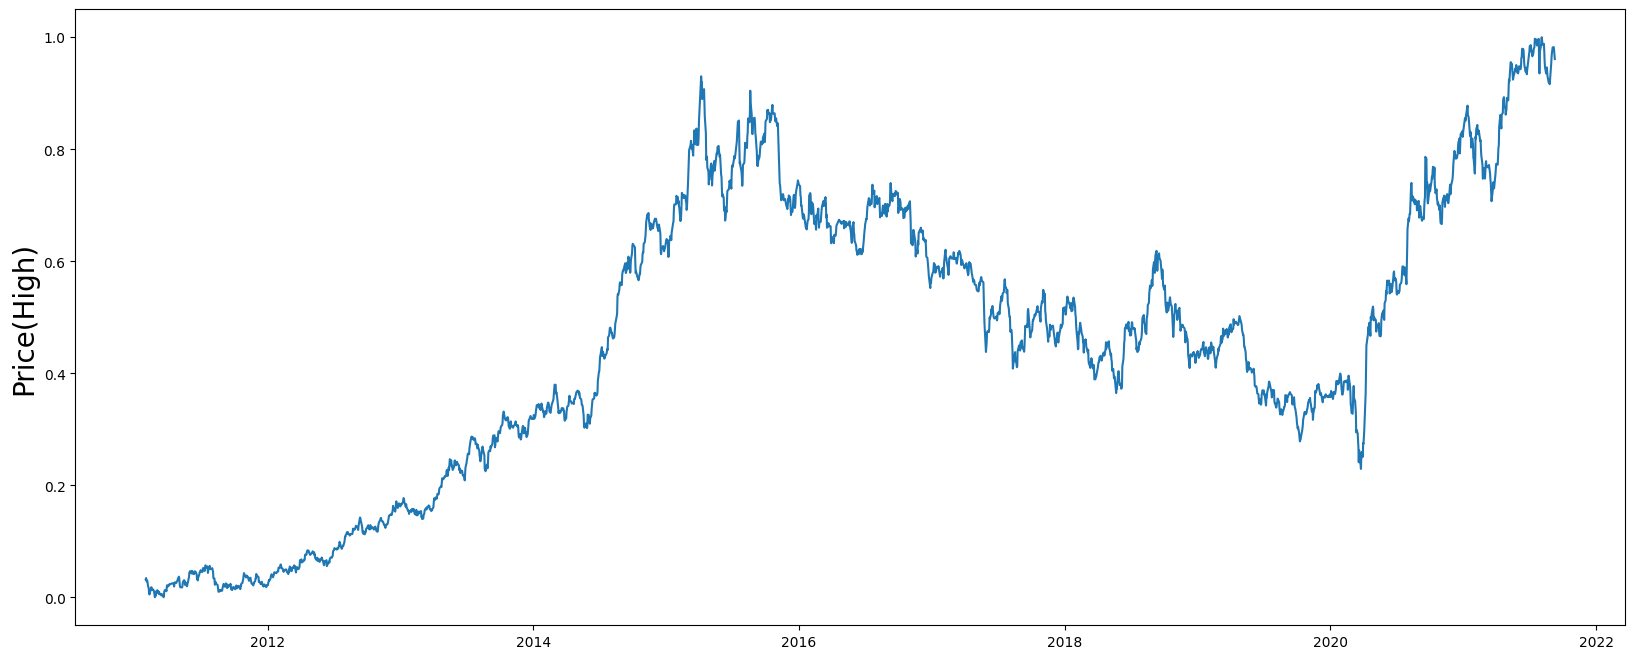

In [35]:
entire_data = data1.set_index('Date')
plt.figure(figsize=(20,8))
plt.ylabel('Price(High)', fontsize=20)
plt.plot(entire_data.High);

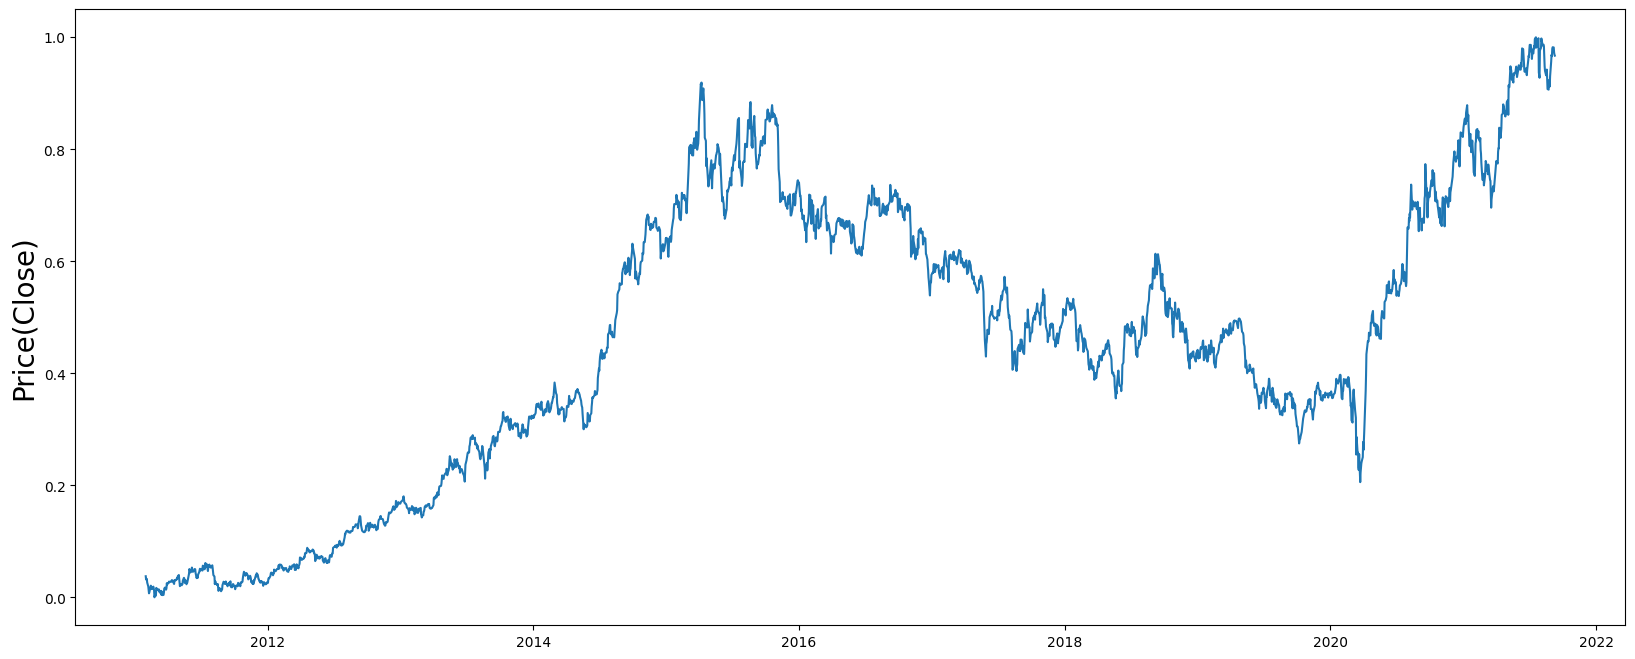

In [36]:
entire_data = data1.set_index('Date')
plt.figure(figsize=(20,8))
plt.ylabel('Price(Close)', fontsize=20)
plt.plot(entire_data.Close);

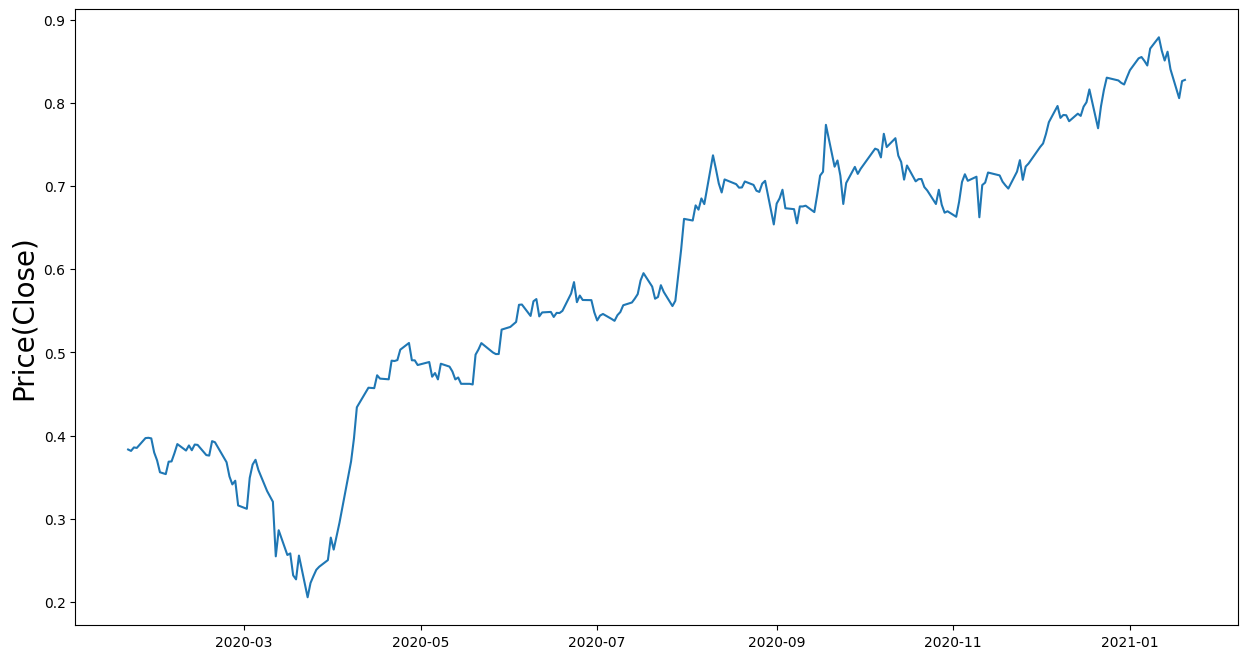

In [37]:
cd_c = covid_data.set_index('Date')
plt.figure(figsize=(15,8))
plt.ylabel('Price(Close)', fontsize=20)
plt.plot(cd_c.Close);